#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*   Jose Salvador Ortiz Sainz de Rozas - A01095149
*   Juan Carlos Alvarado Carricarte - A01793486
*   Rogelio Chávez López - A01794226
*   Sergio López Madriz - A01064725
*   Hansel Zapiain Rodríguez - A00469031 


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import power_transform, PowerTransformer, MinMaxScaler,  StandardScaler, OneHotEncoder,  QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config, metrics
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_validate, GridSearchCV, validation_curve, learning_curve
from sklearn.metrics import confusion_matrix, plot_roc_curve, recall_score, roc_auc_score,make_scorer, RocCurveDisplay, accuracy_score, f1_score, classification_report  
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.svm import SVC

from collections import Counter 



#**Ejercicio-1.** 
Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0

In [ ]:
mypath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat'

In [ ]:
df = pd.read_csv(mypath, sep=" ")
df.columns =["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15" ]
df.head(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1


In [ ]:
df.shape

(689, 15)

In [ ]:
df.dtypes

A1       int64
A2     float64
A3     float64
A4       int64
A5       int64
A6       int64
A7     float64
A8       int64
A9       int64
A10      int64
A11      int64
A12      int64
A13      int64
A14      int64
A15      int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      689 non-null    int64  
 1   A2      689 non-null    float64
 2   A3      689 non-null    float64
 3   A4      689 non-null    int64  
 4   A5      689 non-null    int64  
 5   A6      689 non-null    int64  
 6   A7      689 non-null    float64
 7   A8      689 non-null    int64  
 8   A9      689 non-null    int64  
 9   A10     689 non-null    int64  
 10  A11     689 non-null    int64  
 11  A12     689 non-null    int64  
 12  A13     689 non-null    int64  
 13  A14     689 non-null    int64  
 14  A15     689 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 80.9 KB


In [ ]:
df.isnull().any() 

A1     False
A2     False
A3     False
A4     False
A5     False
A6     False
A7     False
A8     False
A9     False
A10    False
A11    False
A12    False
A13    False
A14    False
A15    False
dtype: bool

In [ ]:
# Algunos ajustes previos con datos categóricos con niveles de muy baja frecuencia:
df['A4'] = df['A4'].map({1:1, 2:2, 3:1})
df['A5'] = df['A5'].map({1:1, 2:2, 3:3, 4:4, 5:2, 6:6, 7:7, 8:8, 9:9, 10:2, 11:11, 12:2, 13:13, 14:14})
df['A6'] = df['A6'].map({1:1, 2:3, 3:3, 4:4, 5:2, 6:6, 7:3, 8:8, 9:3})
df['A12'] = df['A12'].map({1:1, 2:2, 3:1})

In [ ]:
X = df.drop({'A15'},axis=1)
y = df['A15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=0)

print('Training set size: ',X_train.shape)
print('Test set size: ',X_test.shape)
print('Y Training set size: ',y_train.shape)
print('Y test set size: ',y_test.shape)

Training set size:  (585, 14)
Test set size:  (104, 14)
Y Training set size:  (585,)
Y test set size:  (104,)


#**Ejercicio-2.**

Análisis Y transformacionesde los datos. 


In [ ]:
c_categorical = ['A4', 'A5', 'A6', 'A12']
c_numerical = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']
c_binary = ['A1', 'A8', 'A9', 'A11']
c_totalcat = np.append(c_categorical,c_binary,axis = 0)

In [ ]:
X.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.677794,31.581974,4.748999,1.760522,7.000000,4.341074,2.224332,0.523948,0.428157,2.403483,0.457184,1.905660,184.136430,1018.103048
std,0.467661,11.856359,4.975215,0.427075,3.820842,2.054790,3.348856,0.499789,0.495171,4.865611,0.498525,0.292513,172.254524,5213.882348
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,22.670000,1.000000,2.000000,3.000000,4.000000,0.165000,0.000000,0.000000,0.000000,0.000000,2.000000,80.000000,1.000000
50%,1.000000,28.670000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,160.000000,6.000000
75%,1.000000,37.750000,7.080000,2.000000,9.000000,4.000000,2.625000,1.000000,1.000000,3.000000,1.000000,2.000000,272.000000,395.000000
max,1.000000,80.250000,28.000000,2.000000,14.000000,8.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2.000000,2000.000000,100001.000000


Las tranformaciones clasicas no funcionan con las variables numericas, por lo que se aplica la transformación Quantile:

In [ ]:
qt = QuantileTransformer(output_distribution='normal', n_quantiles=300)

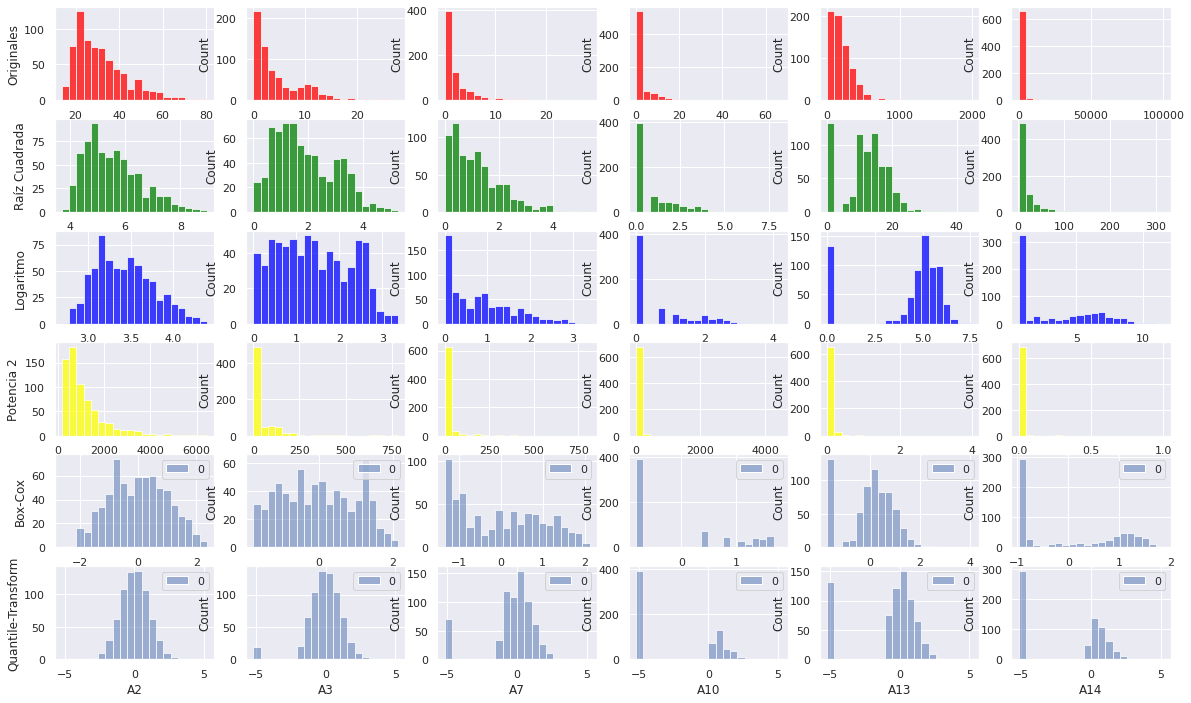

In [ ]:
sns.set(rc={'figure.figsize':(20,12)})
fig, axes = plt.subplots(6, 6)    
  
for k in range(0,6):       
    plt.subplot(6,6,k+1) 

    Transf0 = df[c_numerical[k]]
    sns.histplot(Transf0,color='red',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Originales')
    

    plt.subplot(6,6,k+7)    

    Transf1 = df[c_numerical[k]].apply(lambda x:np.sqrt(x))
    sns.histplot(Transf1,color='green',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')
    
    
    plt.subplot(6,6,k+13)     

    Transf2 = df[c_numerical[k]].apply(lambda x: np.log(x+1))
    sns.histplot(Transf2,color='blue',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Logaritmo')


    plt.subplot(6,6,k+19)

    Transf3 = df[c_numerical[k]].apply(lambda x: x**2)
    sns.histplot(Transf3,color='Yellow',bins=20)
 
    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Potencia 2')
    

    plt.subplot(6,6,k+25)

    Transf4 = power_transform(df[c_numerical[k]].to_numpy().reshape(-1,1)+1,method='box-cox')
    sns.histplot(Transf4,color='Gray',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Box-Cox')

    plt.subplot(6,6,k+31)

    Transf5 = qt.fit_transform(df[c_numerical[k]].to_numpy().reshape(-1, 1))
    sns.histplot(Transf5,color='Purple',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Quantile-Transform')


plt.show()

Se prueba aplicando una estandarización de los datos

In [ ]:

standar = StandardScaler()
std_X = standar.fit_transform(X[c_numerical])
std_X = pd.DataFrame(std_X)
std_X.columns =([c_numerical])
std_X.head()

,A2,A3,A7,A10,A13,A14
0,-0.752208,0.452772,-0.615383,-0.494332,-0.140223,-0.195218
1,-0.168975,-0.603226,-0.291156,-0.494332,0.556927,-0.195218
2,-0.836612,1.357912,-0.664689,1.768074,-1.069755,-0.195218
3,-0.963219,0.688108,-0.078989,2.385094,-0.721181,-0.164892
4,-1.329533,-0.837557,-0.216450,-0.082986,-0.488797,-0.195218


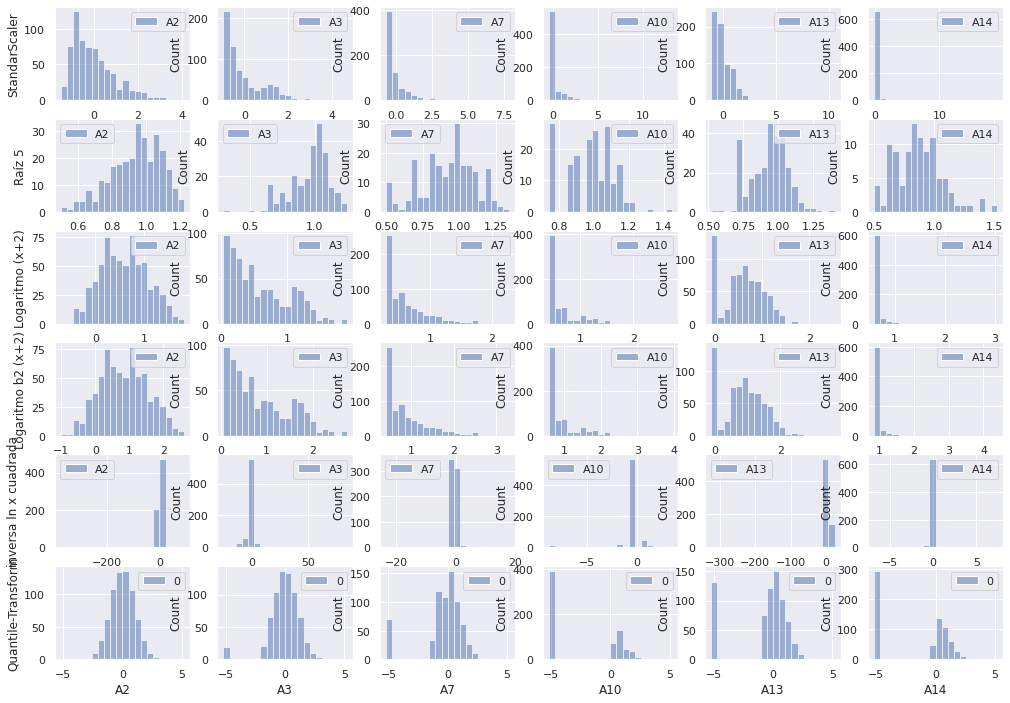

In [ ]:
sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(6, 6)    
  
for k in range(0,6):       
    plt.subplot(6,6,k+1) 

    Transf0 = std_X[c_numerical[k]]
    sns.histplot(Transf0,color='red',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('StandarScaler')
    

    plt.subplot(6,6,k+7)    

    Transf1 = std_X[c_numerical[k]].apply(lambda x:x**(1/7))
    sns.histplot(Transf1,color='green',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Raíz 5')
    
    
    plt.subplot(6,6,k+13)     

    Transf2 = std_X[c_numerical[k]].apply(lambda x: np.log(x+2))
    sns.histplot(Transf2,color='blue',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Logaritmo (x+2)')


    plt.subplot(6,6,k+19)

    Transf3 = std_X[c_numerical[k]].apply(lambda x:np.log2(x+2))
    sns.histplot(Transf3,color='Yellow',bins=20)
 
    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Logaritmo b2 (x+2)')
    

    plt.subplot(6,6,k+25)

    Transf4 = std_X[c_numerical[k]].apply(lambda x: 1/(np.log(x**2)))
    sns.histplot(Transf4,color='Gray',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('inversa ln x cuadrada')

    plt.subplot(6,6,k+31)

    Transf5 = qt.fit_transform(std_X[c_numerical[k]].to_numpy().reshape(-1, 1))
    sns.histplot(Transf5,color='Purple',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Quantile-Transform')


plt.show()

Se intenta ahora con MinMax para poder normalizar los datos de la variable "A10"

In [ ]:
scaler = MinMaxScaler()
mnm_X = scaler.fit_transform(std_X[c_numerical])
mnm_X = pd.DataFrame(mnm_X)
mnm_X.columns =([c_numerical])
mnm_X.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,A2,A3,A7,A10,A13,A14
0,0.134135,0.250000,0.005789,0.000000,0.08,0.00000
1,0.238045,0.062500,0.043860,0.000000,0.14,0.00000
2,0.119098,0.410714,0.000000,0.164179,0.00,0.00000
3,0.096541,0.291786,0.068772,0.208955,0.03,0.00158
4,0.031278,0.020893,0.052632,0.029851,0.05,0.00000


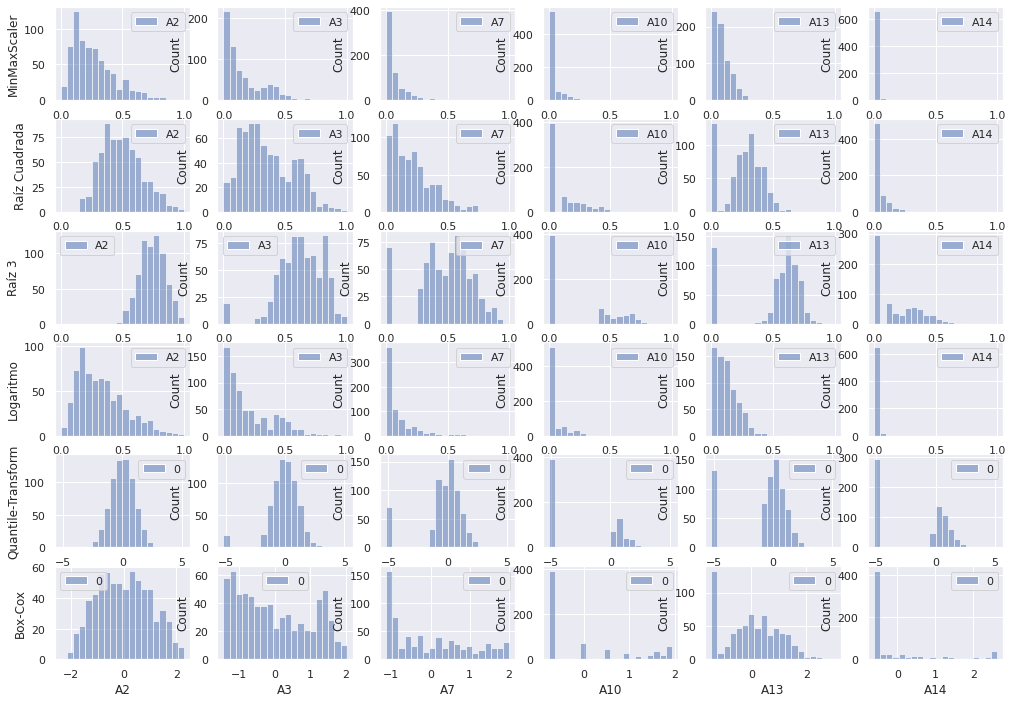

In [ ]:


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(6, 6)    
  
for k in range(0,6):       
    plt.subplot(6,6,k+1) 

    Transf0 = mnm_X[c_numerical[k]]
    sns.histplot(Transf0,color='red',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('MinMaxScaler')
    

    plt.subplot(6,6,k+7)    

    Transf1 = mnm_X[c_numerical[k]].apply(lambda x: x**(1/2))
    sns.histplot(Transf1,color='green',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')
    
    
    plt.subplot(6,6,k+13)     

    Transf2 = mnm_X[c_numerical[k]].apply(lambda x:  x**(1/5))
    sns.histplot(Transf2,color='blue',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Raíz 3')


    plt.subplot(6,6,k+19)

    Transf3 = mnm_X[c_numerical[k]].apply(lambda x: (np.log2((x+1))))
    sns.histplot(Transf3, color='Yellow', bins=20)
 
    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Logaritmo')
    

    plt.subplot(6,6,k+25)

    Transf4 = qt.fit_transform(mnm_X[c_numerical[k]].to_numpy().reshape(-1, 1))
    sns.histplot(Transf4,color='Purple',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Quantile-Transform')

    plt.subplot(6,6,k+31)

    Transf5 = power_transform(mnm_X[c_numerical[k]].to_numpy().reshape(-1,1)+1,method='box-cox')
    sns.histplot(Transf5,color='Grey',bins=20)

    plt.xlabel(c_numerical[k])
    if k==0:
      plt.ylabel('Box-Cox')


plt.show()

La variable A10 no responde a ninguna de las transformaciones probada, el 57% de sus valores se concentran en cero.

In [ ]:
df['A10'].value_counts()/df.shape[:1]

0     0.571843
1     0.103048
2     0.065312
3     0.040639
6     0.033382
11    0.027576
5     0.026125
7     0.023222
4     0.021771
9     0.014514
8     0.014514
10    0.011611
12    0.011611
14    0.011611
15    0.005806
16    0.004354
17    0.002903
20    0.002903
67    0.001451
19    0.001451
40    0.001451
13    0.001451
23    0.001451
Name: A10, dtype: float64

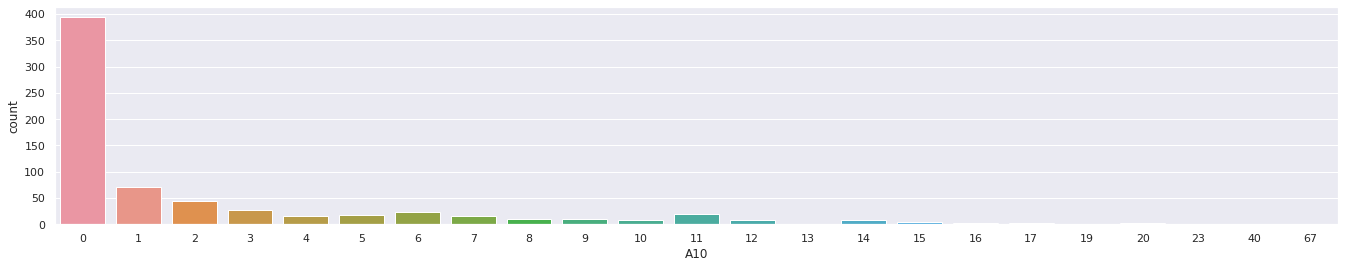

In [ ]:
sns.set(rc={'figure.figsize':(23,4)})
sns.countplot(x = "A10", data = df)

Finalnalmente para evitar el filtrado de información se utiliza un Pipeline:

In [ ]:
set_config(display="diagram")
numerical_tranformer_pipeline = Pipeline(steps = [('impMean', SimpleImputer(strategy='mean')),
                                        ('standar', StandardScaler()),
                                        ('quantile',QuantileTransformer(output_distribution='normal', n_quantiles=100))
                                        #, ('box-cox', PowerTransformer(method='box-cox'))
                                        ])

categorical_tranformer_pipeline = Pipeline(steps = [('impMode', SimpleImputer(strategy='most_frequent')),
                                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

columnasTransformer = ColumnTransformer(transformers = [('numerical', numerical_tranformer_pipeline, c_numerical),
                                                        ('categorical', categorical_tranformer_pipeline, c_totalcat),], 
                                        remainder='passthrough')
columnasTransformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('impMean', SimpleImputer()),
                                                 ('standar', StandardScaler()),
                                                 ('quantile',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      output_distribution='normal'))]),
                                 ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']),
                                ('categorical',
                                 Pipeline(steps=[('impMode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 array(['A4', 'A5', 'A6', 'A12', 'A1', 'A8', 'A9', 'A11'], dtype='<U3'))])

#**Ejercicio-3.**

Con el conjunto de datos de entrenamiento y validación se ha utilizado la función Dummy para modelos de clasificación con la estrategia “stratified"

In [ ]:
#Resultados para el conjunto de entreamiento / validación:
dummy_regr = DummyClassifier(strategy='stratified')
dummy_regr.fit(X_train, y_train)
train_yhat = dummy_regr.predict(X_train)


Se han obtenido los valores de partida (baseline) de las siguientes métricas: *accuracy, f1-score, precision y recall*.

In [ ]:
def mi_accuracy(yreal, ypred):
    vn,fp,fn,vp = confusion_matrix(yreal, ypred).ravel()
    accuracy = (vp+vn)*1.0 / (vn+fp+fn+vp)
    return accuracy

def mi_precision(yreal, ypred):
    vn,fp,fn,vp = confusion_matrix(yreal, ypred).ravel()
    precision = (vp)*1.0 / (vp+fp)
    return precision

def mi_recall(yreal, ypred):
    vn,fp,fn,vp = confusion_matrix(yreal, ypred).ravel()
    recall = (vp)*1.0 / (vp+fn)
    return recall

def mi_f1(yreal, ypred):
    precision = mi_precision(yreal, ypred)
    recall = mi_recall(yreal, ypred)
    f1 = 2.0*precision*recall/(precision+recall)
    return f1

In [ ]:
def get_models():
    modelos, nombres = list(), list()

  # técnica y nombre: Dummy
    modelos.append( DummyClassifier(strategy='stratified'))
    nombres.append('Dummy')

    return modelos, nombres

In [ ]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()

for i in range(len(modelos)):
 
    kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
    mi_pipe = Pipeline(steps=[("preprocessor", columnasTransformer), ("classifier", modelos[i])])
    mismetricas = {'accuracy':make_scorer(mi_accuracy),'precision':make_scorer(mi_precision),'recall':make_scorer(mi_recall),'f1-score':make_scorer(mi_f1)}
    resultados_out = cross_validate(mi_pipe, 
                          X_train, y_train,
                          scoring=mismetricas,
                          cv=kfold)
                                    
    resultados.append(resultados_out)
    
    
    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1-score: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados_out['test_accuracy']),
                                                                          np.std(resultados_out['test_accuracy']),
                                                                          np.mean(resultados_out['test_precision']),
                                                                          np.std(resultados_out['test_precision']),
                                                                          np.mean(resultados_out['test_recall']),
                                                                          np.std(resultados_out['test_recall']),
                                                                          np.mean(resultados_out['test_f1-score']),
                                                                          np.std(resultados_out['test_f1-score']),
                                                                          ))



Dummy:
mean Accuracy: 0.496 (0.0529)
mean Precision: 0.452 (0.0547)
mean Recall: 0.475 (0.0633)
mean F1-score: 0.462 (0.0550)



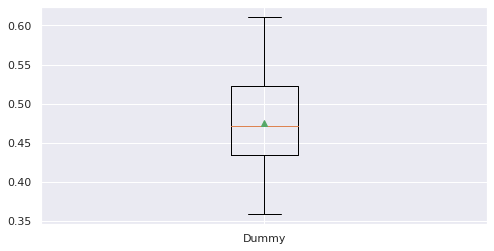

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
bpresultados = list()
for i in range(len(resultados)):
    rr = resultados[i]['test_recall']
    bpresultados.append(rr)
    
plt.boxplot(bpresultados, labels=nombres, showmeans=True)
plt.show()

¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso? 

#**Ejercicio-4.**

Modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros 
con una búsqueda de malla y validación cruzada.

Errores indicados en el ejercicio anterior. 


In [ ]:
svmodel = SVC(kernel='sigmoid', C=1, gamma='auto')
svmodel.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='sigmoid')

In [ ]:
confusion_matrix(y_train, svmodel.predict(X_train))

array([[318,   0],
       [267,   0]])

In [ ]:
def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()

# Estrategia para encontrar el mejor estimador 
# Referencia: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.85

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

In [ ]:
svmodel = SVC()
param={'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
       'C':[.1, 1, 10],
       'degree':[3, 8],
       'coef0':[0.001, 10, 0.5],
       'gamma':('auto', 'scale')}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=11)

In [ ]:
metricas = {'accuracy':'accuracy','f1':'f1','precision':'precision','recall':'recall'}

grids=GridSearchCV(estimator=svmodel, 
                   param_grid=param, 
                   cv=cv,
                   scoring=metricas,
                   refit=refit_strategy,
                   return_train_score=True,
                   error_score='raise',
                   n_jobs=-1,
                   )
Xx = columnasTransformer.fit_transform(X_train)
grids.fit(Xx, y_train)

#print('Mejor valor de precision (scoring) obtenido con la mejor combinación:', grids.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grids.best_params_)
print('Métrica utilizada:', grids.scoring)

All grid-search results:
precision: 0.786 (±0.035), recall: 0.925 (±0.027), for {'C': 0.1, 'coef0': 0.001, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
precision: 0.736 (±0.041), recall: 0.669 (±0.057), for {'C': 0.1, 'coef0': 0.001, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
precision: 0.712 (±0.040), recall: 0.724 (±0.049), for {'C': 0.1, 'coef0': 0.001, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
precision: 0.770 (±0.062), recall: 0.511 (±0.071), for {'C': 0.1, 'coef0': 0.001, 'degree': 3, 'gamma': 'auto', 'kernel': 'sigmoid'}
precision: 0.786 (±0.035), recall: 0.925 (±0.027), for {'C': 0.1, 'coef0': 0.001, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
precision: 0.734 (±0.041), recall: 0.666 (±0.053), for {'C': 0.1, 'coef0': 0.001, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
precision: 0.713 (±0.045), recall: 0.693 (±0.045), for {'C': 0.1, 'coef0': 0.001, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
precision: 0.721 (±0.053), recall: 0.621 (±0.071), for {'

In [ ]:
Xx = columnasTransformer.fit(X_train)
XxTest = Xx.fit_transform(X_test)
y_pred = grids.predict(XxTest)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        64
           1       0.81      0.88      0.84        40

    accuracy                           0.88       104
   macro avg       0.87      0.88      0.87       104
weighted avg       0.88      0.88      0.88       104



#**Ejercicio-5.**

Diagramas de caja y bigote del mejor modelo.
 


In [ ]:
def get_models():
    modelos, nombres = list(), list()

  # técnica y nombre: Dummy
    modelos.append( DummyClassifier(strategy='stratified'))
    nombres.append('Dummy')

  # técnica y nombre: SVM
    modelos.append(SVC(C=0.1, coef0=10, degree=3, gamma='auto', kernel='poly'))
    nombres.append('SVM')


    return modelos, nombres

Métricas calculadas.

In [ ]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()

for i in range(len(modelos)):
 
    kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
    mi_pipe = Pipeline(steps=[("preprocessor", columnasTransformer), ("classifier", modelos[i])])
    mismetricas = {'accuracy':make_scorer(mi_accuracy),'precision':make_scorer(mi_precision),'recall':make_scorer(mi_recall),'f1-score':make_scorer(mi_f1)}
    resultados_out = cross_validate(mi_pipe, 
                          X_train, y_train,
                          scoring=mismetricas,
                          cv=kfold)
                                    
    resultados.append(resultados_out)
    
    
    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1-score: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados_out['test_accuracy']),
                                                                          np.std(resultados_out['test_accuracy']),
                                                                          np.mean(resultados_out['test_precision']),
                                                                          np.std(resultados_out['test_precision']),
                                                                          np.mean(resultados_out['test_recall']),
                                                                          np.std(resultados_out['test_recall']),
                                                                          np.mean(resultados_out['test_f1-score']),
                                                                          np.std(resultados_out['test_f1-score']),
                                                                          ))

Dummy:
mean Accuracy: 0.508 (0.0376)
mean Precision: 0.462 (0.0393)
mean Recall: 0.476 (0.0607)
mean F1-score: 0.468 (0.0460)

SVM:
mean Accuracy: 0.853 (0.0336)
mean Precision: 0.838 (0.0283)
mean Recall: 0.841 (0.0770)
mean F1-score: 0.838 (0.0448)



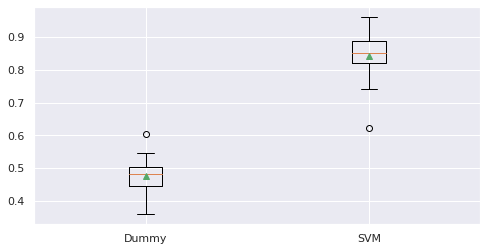

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
bpresultados = list()
for i in range(len(resultados)):
    rr = resultados[i]['test_recall']
    bpresultados.append(rr)
    
plt.boxplot(bpresultados, labels=nombres, showmeans=True)
plt.show()

Incluye tus conclusiones: El modelo SVM con parámetros ideales tiene un recall bastante significativo por lo cuál se puede determianr que es un buen modelo. No obstante puede existir el riesgo que dicho modelo se encuentre sobre entrenado y que sea necesario eliminar variables con un alto indice de multicolinealidad.

#**Ejercicio-6.**

Verificación del ajuste del modelo mediante alguna de las gráficas de curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento)

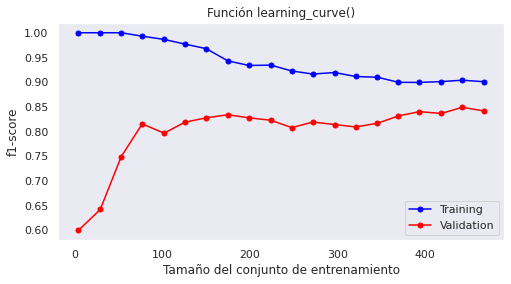

In [ ]:
modelo = SVC(C=0.1, coef0=10, degree=3, gamma='auto', kernel='poly')

delta_train = np.linspace(0.01, 1.0, 20)
Xx = columnasTransformer.fit_transform(X_train)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)

train_sizes, train_scores, valid_scores = learning_curve(modelo, 
                                                           X=Xx, 
                                                           y=np.ravel(y_train),
                                                           cv=cv,
                                                           train_sizes=delta_train,
                                                           scoring=make_scorer(mi_recall))

# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve()')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('f1-score')
plt.grid()
plt.legend(loc='lower right')
plt.show()

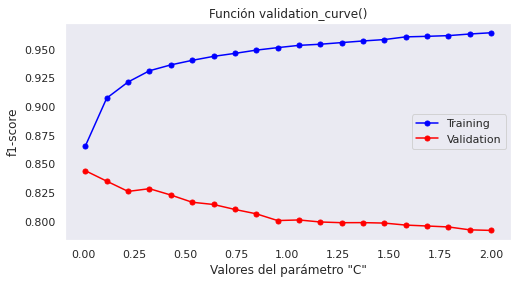

In [ ]:
modelo = SVC(C=0.1, coef0=10, degree=3, gamma='auto', kernel='poly')

delta = np.linspace(.01, 2, 20)
Xx = columnasTransformer.fit_transform(X_train)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)

train_scores, valid_scores = validation_curve(modelo, 
                                              X=Xx, 
                                              y=np.ravel(y_train), 
                                              param_name="C", 
                                              param_range=delta,
                                              cv=cv,
                                              scoring=make_scorer(mi_f1))


# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve()')
plt.xlabel('Valores del parámetro "C"')
plt.ylabel('f1-score')
plt.grid()
plt.legend(loc='center right')
plt.show()

¿Subentrenado o sobreentrenado ?
Este modelo se encuentra sobreentrenado ya que a pesar de alcanzar un excelente f1 score con la data de entrenamiento al hacerle visibile información nueva con el set de validación se puede apreciar que su desempeño no es tan bueno.

#**Ejercicio-7.**

Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva.

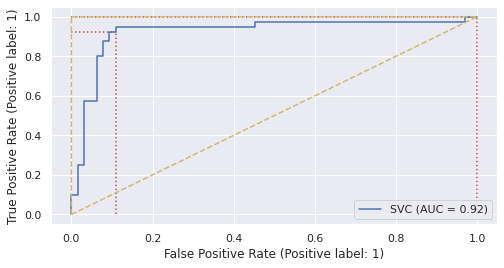

In [ ]:
# Obtenemos las predicciones del modelo:
modelo.fit(Xx, y_train)
Xxtest = columnasTransformer.fit_transform(X_test)

yhat = modelo.predict(Xxtest)

# Obtenemos la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr):
fpr, tpr, _ = metrics.roc_curve(y_test, yhat)


metrics.RocCurveDisplay.from_estimator(modelo, Xxtest, y_test)

plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate 
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado
plt.show()

#**Ejercicio-8.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score. 


In [ ]:
svmodel = SVC()

krn=['linear', 'rbf', 'poly', 'sigmoid']
rnc=np.arange(.1, 1, 10)
deg=np.arange(3, 8)
coe=np.arange(0.001, 10, 0.5)
gam=['auto', 'scale']

best_f1=0
for i in krn:
  for j in rnc:
    for k in deg:
      for l in coe:
        for m in gam:
          svmodel=SVC(kernel=i, C=j, degree=k, coef0=l, gamma=m)
          svmodel.fit(Xxtest, y_test)
          f1score=f1_score(y_test, modelo.predict(Xxtest), average='binary')
          if best_f1<f1score:
            best_f1=f1score
            bi=i
            bj=j
            bk=k
            bl=l
            bm=m
print(best_f1, bi, bj, bk, bl, bm)           

0.8809523809523809 linear 0.1 3 0.001 auto


#**Ejercicio-9.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica gmean. 

In [ ]:
def mi_specificity(yreal, ypred):
    vn,fp,fn,vp = confusion_matrix(yreal, ypred).ravel()
    specificity = (vn)*1.0 / (vn+fn)
    return specificity

def mi_gmean(yreal, ypred): 
    recall = mi_recall(yreal, ypred)
    specificity = mi_specificity(yreal, ypred)
    gmean = np.sqrt(recall*specificity)
    return gmean

In [ ]:
svmodel = SVC()

krn=['linear', 'rbf', 'poly', 'sigmoid']
rnc=np.arange(.1, 1, 10)
deg=np.arange(3, 8)
coe=np.arange(0.001, 10, 0.5)
gam=['auto', 'scale']

best_gmean=0
for i in krn:
  for j in rnc:
    for k in deg:
      for l in coe:
        for m in gam:
          svmodel=SVC(kernel=i, C=j, degree=k, coef0=l, gamma=m)
          svmodel.fit(Xxtest, y_test)
          gmean=mi_gmean(y_test, modelo.predict(Xxtest))
          if best_f1<f1score:
            best_f1=f1score
            bi=i
            bj=j
            bk=k
            bl=l
            bm=m
print(best_gmean, bi, bj, bk, bl, bm)    

#**Ejercicio-10.**

Conclusiones finales de la actividad: Sin lugar a duda los algorítmos de SVM son una excelente solución geométrica de claisificación no obstante se puede apreciar que es altamente sensible a sobre entrenarse debido al incremental de planos que se coloquen (especialmente si sale de un gridsearch). Motivo por el cuál se debe de encontrar un f1 score óptimo que no incremente significativamente el numero de planos o al mismo tiempo depreciar variables que tengan un alto índice de multicolinealidad para simplicar la separación por planos.

###**Fin de la Actividad de la semana 8.**